In [1]:
import numpy as np
import cv2
import sys 
import matplotlib.pyplot as plt
import os

In [3]:
img_list = os.listdir('./fig/images/')

img_lists = []

for i in img_list:
    file_path = './fig/images/' + i
    img_lists.append(file_path)
    
img_lists

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_lists[idx])
    
    cv2.imshow('image', img)
    
    if cv2.waitKey(3000) == 27:
        break
        
    idx += 1
    
    if idx >= len(img_lists):
        idx = 0
        
cv2.destroyAllWindows()

In [2]:
src = cv2.imread('./fig/airplane.bmp')
mask = cv2.imread('./fig/mask_plane.bmp')
dst = cv2.imread('./fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
##
img = np.full((600, 1200, 3), 255, np.uint8)

cv2.line(img, (50, 50), (200, 50), (0, 0, 255), 3)
cv2.arrowedLine(img, (200, 50), (200, 200), (255, 0, 255), 3)
cv2.rectangle(img, (50, 300), (100, 400), (255, 0, 0), -1)
cv2.rectangle(img, (50, 300, 100, 400), (0, 0, 255), 4)
cv2.circle(img, (500, 300), 100, (0, 255, 255), 3, cv2.LINE_AA)
cv2.putText(img, 'Opencv', (500, 300), cv2.FONT_HERSHEY_COMPLEX,
           1, (0, 255, 0), 2, cv2.LINE_AA)

cv2.imshow('img', img)


cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)* 0.7)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

out = cv2.VideoWriter('output.avi', fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print('frame open failed')
        break
        
    out.write(frame)
    cv2.imshow('image', frame)
    
    key = cv2.waitKey(30)
    if key == 27:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [4]:
def call_mouse(event, x, y, flags, param):
    
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        #print('left button down {} {}'.format(x, y))

    elif event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.imshow('image', img)
            oldx, oldy = x, y
        
img = np.ones((500, 600, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)


cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
def call_track(pos):
    img[:] = img1*(pos/255)
    cv2.imshow('image', img)

img = cv2.imread('./fig/airplane.bmp', 0)

img1 = img.copy()

cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0, 255, call_track)
cv2.waitKey()
cv2.destroyAllWindows()

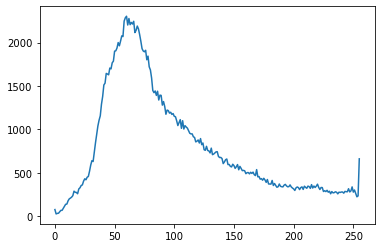

In [4]:
src = cv2.imread('./fig/flowers.jpg', 0)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(hist)
plt.show()
cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

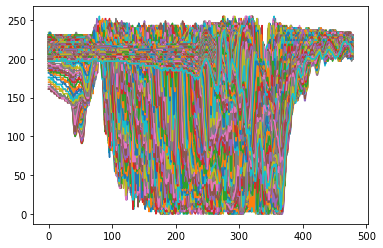

In [7]:
src = cv2.imread('./fig/puppy_shrink.png', 0)
src_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
src_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)


plt.plot(src_norm)
#plt.plot(src_equal)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
src = cv2.imread('./fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

src_norm = cv2.merge((h, s, v_norm))
src_equal = cv2.merge((h, s, v_equal))

src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)



cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)


cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
src = cv2.imread('./fig/palette.png')


src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#dst_bgr = cv2.inRange(src, (0, 0, 200), (50, 50, 255))
dst_bgr = cv2.inRange(src, (100, 0, 0), (255, 50, 50))
dst_hsv = cv2.inRange(src_hsv, (120, 200, 0), (140, 255, 255))

cv2.imshow('src', src)
cv2.imshow('dst_bgr', dst_bgr)
cv2.imshow('dst_hsv', dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()

In [20]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('hmin', 'src')
    hmax = cv2.getTrackbarPos('hmax', 'src')
    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('src', dst)
    


src = cv2.imread('./fig/palette.png')


src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('src', src)
cv2.createTrackbar('hmin', 'src', 50, 179, call_track)
cv2.createTrackbar('hmax', 'src', 50, 179, call_track)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
